In [1]:
# Standard Python modules
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import yaml
import glob

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

# Import my modules
sys.path.append('../modules') # Path to modules
import ar_funcs
from plotter import draw_basemap

ERROR 1: PROJ: proj_create_from_database: Open of /home/dnash/miniconda3/envs/SEAK-impacts/share/proj failed


In [2]:
path_to_data = '/cw3e/mead/projects/cwp140/scratch/dnash/data/'      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
fname_lst = glob.glob('../out/combined_df_*.csv')
print(fname_lst)
df_lst = []
df_lst2 = [] # whole dataset
for i, fname in enumerate(fname_lst):   
    df = pd.read_csv(fname)
    
    ## clean freezing level - set to nan where freezing level > 10000 m
    df.loc[(df.freezing_level > 10000), 'freezing_level'] = np.nan 
    
    ## clean ASOS_1hr - set to nan where ASOS_1hr > 200 mm per hour
    df.loc[(df.ASOS_1hr > 50), 'ASOS_1hr'] = np.nan
    df.loc[((df.ASOS_prec_accum > 600) | (df.ASOS_prec_accum < 0)), 'ASOS_prec_accum'] = np.nan 
    
    df_lst2.append(df)
    df = df.loc[df['impact_scale'] >= 0]
    
    df_lst.append(df)
    
result = pd.concat(df_lst)
result

['../out/combined_df_HONA2.csv', '../out/combined_df_PAYA.csv', '../out/combined_df_PAPG.csv', '../out/combined_df_PAHN.csv', '../out/combined_df_PAKW.csv', '../out/combined_df_COOPHCSA2.csv', '../out/combined_df_KTNA2.csv', '../out/combined_df_PAGY.csv', '../out/combined_df_PAJN.csv', '../out/combined_df_PAWG.csv', '../out/combined_df_PAGS.csv', '../out/combined_df_PASI.csv', '../out/combined_df_PAKT.csv']


,trackID,Unnamed: 0,trackID.1,start_date,end_date,duration,IVT_max,IVT_max_time,IVT_dir,tIVT,...,ASOS_1hr,ASOS_3hr,ASOS_6hr,ASOS_12hr,ASOS_24hr,impact_scale,impacts,impact_notes,impact_type,misc
78,2.000123e+11,78,2.000123e+11,2000-12-27 00:00:00,2000-12-29 00:00:00,6.0,169.712493,2000-12-28T21:00:00.000000000,2.858499,4.115330e+07,...,NaN,NaN,NaN,NaN,NaN,0.0,1,No recorded impact in Hoonah but big event in ...,No recorded impact in Hoonah,widespread ar; 12/23/1999 -12/28/2000
79,2.000123e+11,79,2.000123e+11,2000-12-27 18:00:00,2000-12-29 18:00:00,6.0,169.712493,2000-12-28T21:00:00.000000000,2.858499,5.282568e+07,...,NaN,NaN,NaN,NaN,NaN,0.0,1,No recorded impact in Hoonah but big event in ...,No recorded impact in Hoonah,widespread ar; 12/23/1999 -12/28/2000
442,2.005112e+11,442,2.005112e+11,2005-11-18 06:00:00,2005-11-25 06:00:00,108.0,667.932040,2005-11-23T03:00:00.000000000,3.363136,2.592700e+08,...,NaN,NaN,NaN,NaN,NaN,3.0,1,"Disaster declerations in Hoonah, Juneau, Haine...","Disaster declerations in Hoonah, Juneau, Haine...",Widespread ar and two consecutive ar events; 1...
1207,2.015092e+11,1207,2.015092e+11,2015-09-17 12:00:00,2015-09-19 12:00:00,30.0,237.307511,2015-09-18T03:00:00.000000000,3.547241,8.488961e+07,...,5.334,11.176,17.526,28.702,47.752,0.0,1,Nothing recorded in Hoonah,Nothing recorded in Hoonah,"AR in Hoonah area, Juneau and Gustavus impacted"
1295,2.016091e+11,1295,2.016091e+11,2016-09-08 18:00:00,2016-09-13 18:00:00,48.0,748.761266,2016-09-13T09:00:00.000000000,3.980798,1.132197e+08,...,9.652,13.462,22.098,33.528,46.990,0.0,1,Nothing recorded in Hoonah,Nothing recorded in Hoonah,AR in Hoonah area and all along northern panha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2.017082e+11,1356,2.017082e+11,2017-08-24 06:00:00,2017-08-27 18:00:00,12.0,316.848469,2017-08-26T03:00:00.000000000,3.484032,1.618738e+08,...,7.366,119.380,134.391,266.217,307.440,0.0,1,Lower Ketchikan lake at the 5th most overflow,Action flooding,NaN
1357,2.017083e+11,1357,2.017083e+11,2017-08-27 18:00:00,2017-08-29 06:00:00,12.0,132.611524,2017-08-28T15:00:00.000000000,4.594241,1.532850e+08,...,NaN,0.000,0.000,0.000,0.000,0.0,1,Lower Ketchikan lake at the 5th most overflow,Action flooding,NaN
1449,2.018121e+11,1449,2.018121e+11,2018-12-06 18:00:00,2018-12-08 06:00:00,36.0,184.688968,2018-12-08T00:00:00.000000000,2.960321,1.171227e+07,...,0.025,0.050,0.050,0.050,0.050,0.0,1,Ketchikan creek at 5th most overflow,Action flooding,NaN
1450,2.018121e+11,1450,2.018121e+11,2018-12-08 06:00:00,2018-12-10 06:00:00,36.0,388.372859,2018-12-09T15:00:00.000000000,2.663867,3.517604e+07,...,0.025,0.075,0.100,0.125,0.200,0.0,1,Ketchikan creek at 5th most overflow,Action flooding,NaN


In [4]:
ARID = int(result.loc[result['impact_scale'] == 5].iloc[0]['trackID'])
start_date = result.loc[result['impact_scale'] == 5].iloc[0]['start_date']
end_date = result.loc[result['impact_scale'] == 5].iloc[0]['end_date']
print(ARID, start_date, end_date)

200511180611 2005-11-18 06:00:00 2005-11-25 06:00:00


In [5]:
ext = [-180., -120., 20, 70]
## open IVT file
ds = ar_funcs.read_GEFSv12_reforecast_data('ivt', ARID)
ds = ds.sel(time=slice(start_date, end_date), lon=slice(ext[0], ext[1]), lat=slice(ext[3], ext[2]))
ds = ds.mean('time')
ds

/home/dnash/miniconda3/envs/SEAK-impacts/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:    (lat: 201, lon: 241)
Coordinates:
  * lat        (lat) float64 70.0 69.75 69.5 69.25 ... 20.75 20.5 20.25 20.0
  * lon        (lon) float64 -180.0 -179.8 -179.5 ... -120.5 -120.2 -120.0
    longitude  (lon) float64 180.0 180.2 180.5 180.8 ... 239.2 239.5 239.8 240.0
Data variables:
    ivtu       (lat, lon) float64 6.366 6.211 6.031 5.793 ... 29.37 30.64 31.9
    ivtv       (lat, lon) float64 -16.43 -16.42 -16.4 ... -16.55 -16.9 -16.62
    ivt        (lat, lon) float64 18.11 18.02 17.92 17.78 ... 50.01 50.1 50.0
    tIVT       (lat, lon) float64 2.646e+07 2.635e+07 ... 3.122e+07 3.167e+07

In [6]:
# Set up projection
# mapcrs = ccrs.Mercator()
mapcrs = ccrs.PlateCarree()
datacrs = ccrs.PlateCarree()

# Set tick/grid locations
lats = ds.lat.values
lons = ds.lon.values
dx = np.arange(lons.min().round(),lons.max().round()+20,20)
dy = np.arange(lats.min().round(),lats.max().round()+10,10)



# list of letters to append to titles
letter_lst = list(map(chr, range(97, 123)))

In [7]:
dx

array([-180., -160., -140., -120.])

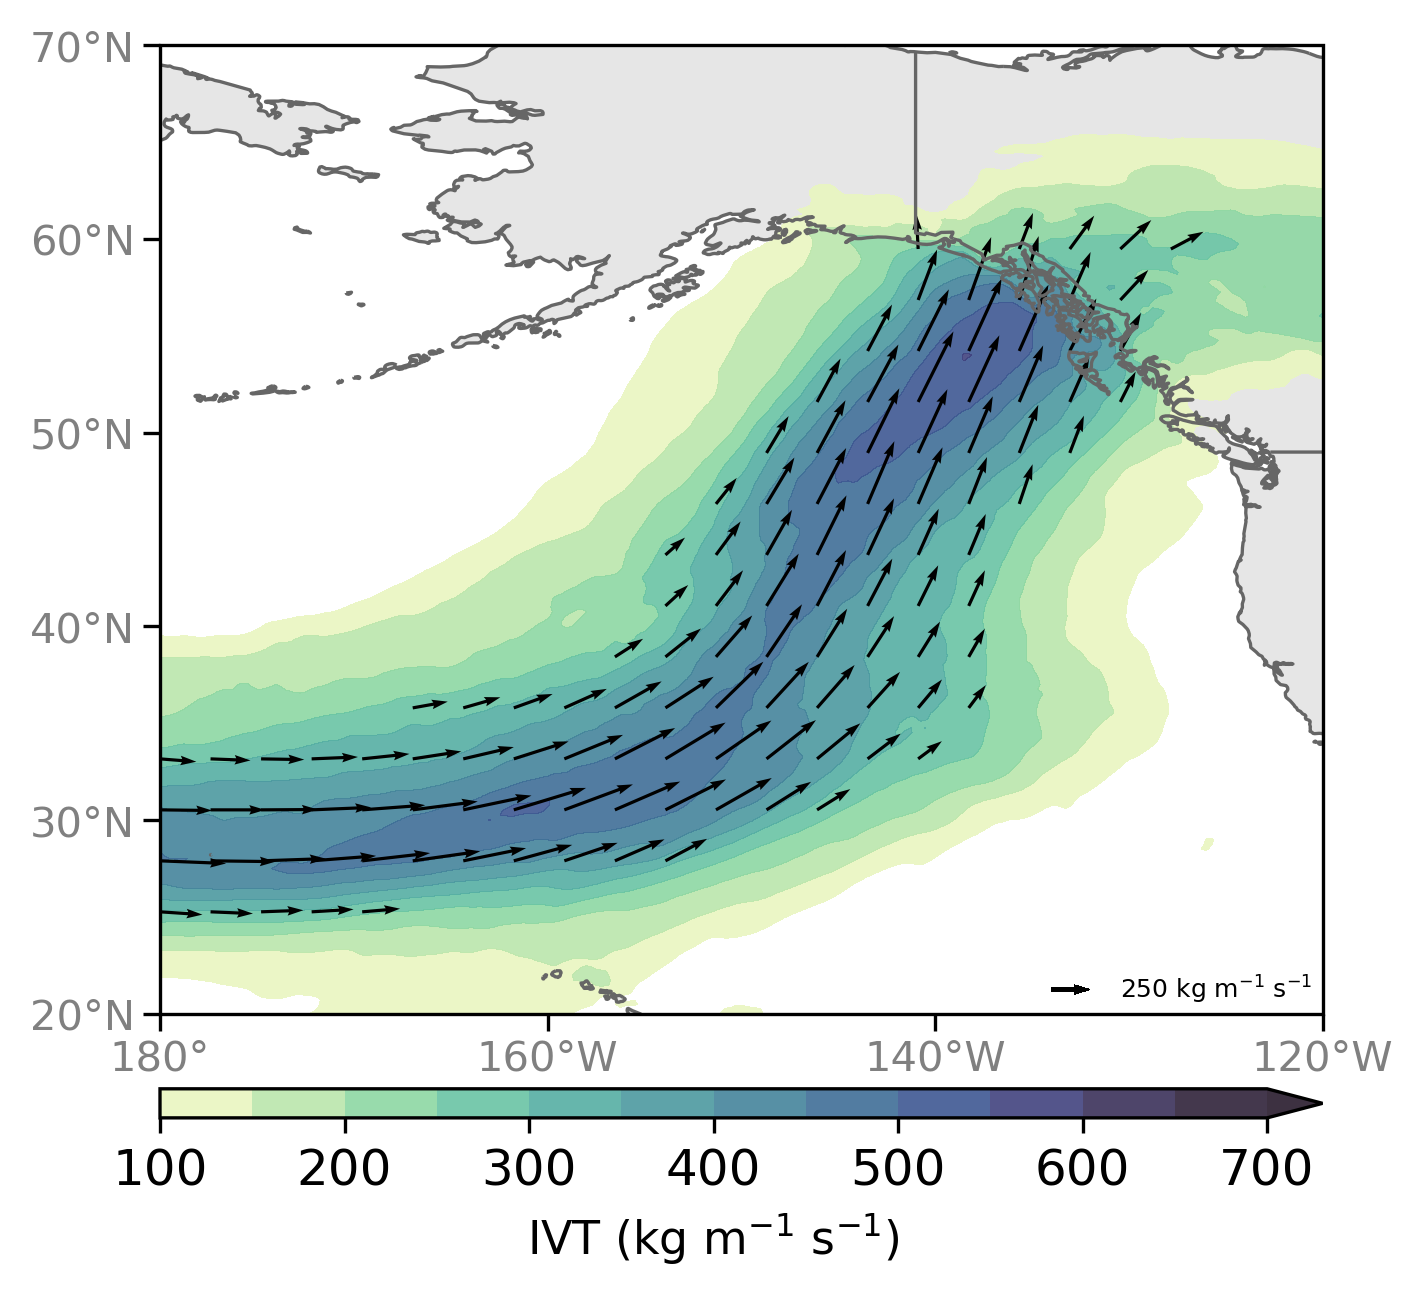

In [8]:
# Create figure
fig = plt.figure(figsize=(5, 5))
fig.dpi = 300
fname = path_to_figs + 'IVT_{0}'.format(ARID)
fmt = 'png'

nrows = 1
ncols = 1


# Set up Axes Grid
axes_class = (GeoAxes,dict(projection=mapcrs))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(nrows, ncols), axes_pad = 0.2,
                cbar_location='bottom', cbar_mode='single',
                cbar_pad=0.05, cbar_size='3%',label_mode='keep')

for k, ax in enumerate(axgr):

    ax = draw_basemap(ax, extent=ext, xticks=dx, yticks=dy, left_lats=True, right_lats=False, bottom_lons=True)

    # Contour Filled
    lats = ds.lat.values
    lons = ds.lon.values
    ivt = ds.ivt.values
    cflevs = np.arange(100, 750, 50) # levels for IVT
    cmap = cmo.deep # cmap for IVT
    cf = ax.contourf(lons, lats, ivt, transform=datacrs,
                     levels=cflevs, cmap=cmap, alpha=0.9, extend='max')

    # Wind barbs / vectors 
    uvec = ds.ivtu.values
    vvec = ds.ivtv.values
    uvec_mask = ds.ivtu.where((ds.ivt >=250.)).values # mask values where IVT magnitude is less than 250 kg m-1 s-1
    vvec_mask = ds.ivtv.where((ds.ivt >=250.)).values # mask values where IVT magnitude is less than 250 kg m-1 s-1

    Q = ax.quiver(lons, lats, uvec_mask, vvec_mask, transform=datacrs, 
              color='k', regrid_shape=20,
              angles='xy', scale_units='xy', scale=125, units='xy')

    # quiver key
    qk = ax.quiverkey(Q, 0.8, 0.025, 250, '250 kg m$^{-1}$ s$^{-1}$', labelpos='E',
                      coordinates='axes', fontproperties={'size': 6.0})

# Colorbar (single)
cb = fig.colorbar(cf, axgr.cbar_axes[0], orientation='horizontal', drawedges=False)
cb.set_label('IVT (kg m$^{-1}$ s$^{-1}$)', fontsize=11)
cb.ax.tick_params(labelsize=12)

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi)

# Show
plt.show()

In [14]:
## open freezing file
ds = ar_funcs.read_GEFSv12_reforecast_data('freezing_level', ARID)
ds = ds.sel(time=slice(start_date, end_date), lon=slice(ext[0], ext[1]), lat=slice(ext[3], ext[2]))

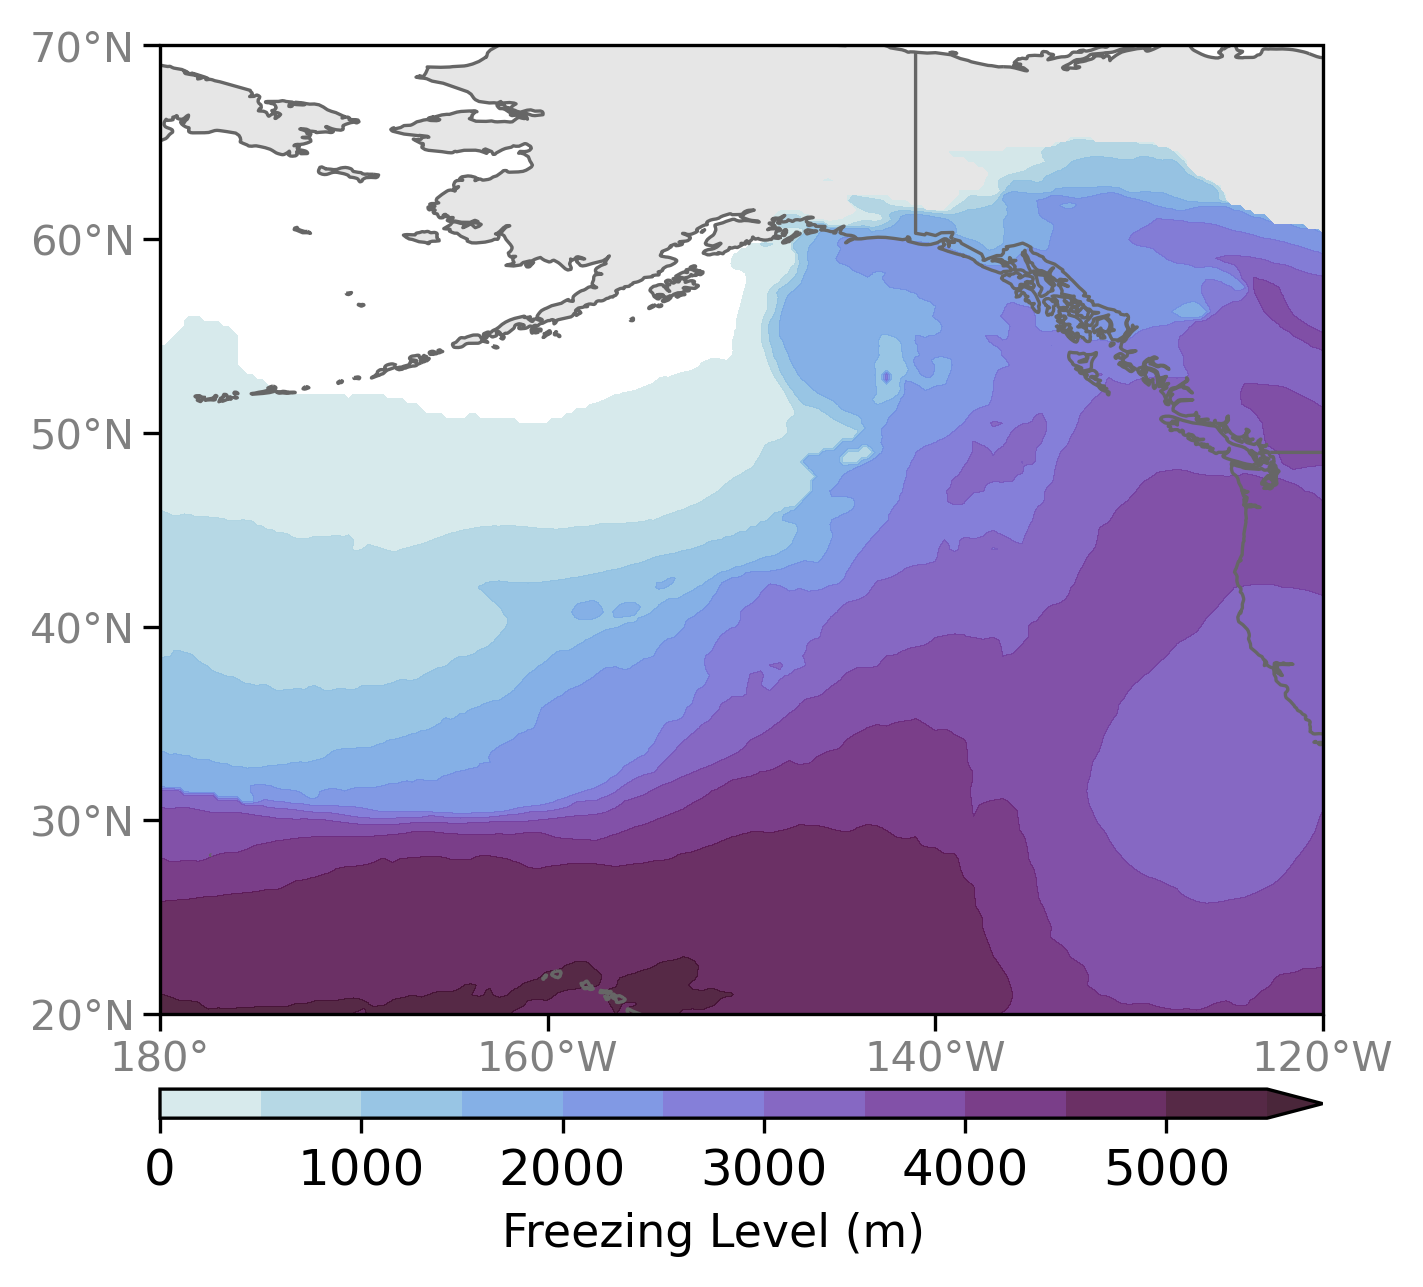

In [17]:
# Create figure
fig = plt.figure(figsize=(5, 5))
fig.dpi = 300
fname = path_to_figs + 'IVT_{0}'.format(ARID)
fmt = 'png'

nrows = 1
ncols = 1


# Set up Axes Grid
axes_class = (GeoAxes,dict(projection=mapcrs))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(nrows, ncols), axes_pad = 0.2,
                cbar_location='bottom', cbar_mode='single',
                cbar_pad=0.05, cbar_size='3%',label_mode='keep')

for k, ax in enumerate(axgr):

    ax = draw_basemap(ax, extent=ext, xticks=dx, yticks=dy, left_lats=True, right_lats=False, bottom_lons=True)

    # Contour Filled
    lats = ds.lat.values
    lons = ds.lon.values
    data = ds.freezing_level.isel(time=40).values
    cflevs = np.arange(0, 6000, 500)
    cmap = cmo.dense 
    cf = ax.contourf(lons, lats, data, transform=datacrs,
                     levels=cflevs, cmap=cmap, alpha=0.9, extend='max')

# Colorbar (single)
cb = fig.colorbar(cf, axgr.cbar_axes[0], orientation='horizontal', drawedges=False)
cb.set_label('Freezing Level (m)', fontsize=11)
cb.ax.tick_params(labelsize=12)

fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi)

# Show
plt.show()